## Task 1
This shows the code if we completed the prediction of the test attributes. This code was completed using the MinMaxScaler preprocessor instead of the StandardScaler version, but the code for the StandardScaler version is also shown there. This shows that the prediction is hundred percent accurate, but the k value is set to 1. 

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = DataFrame()
df['Year'] = ['F','T','F','T',  'F','T','F','T',    'F','T']
df['enrol'] = [200, 100, 210, 105,   220, 120,230,90,   223, 102]
df['gpa'] = [2.9, 3.2, 3, 3.19,     3.05, 3.3, 28, 3.5,     3.1, 3.03]
dfX = df.drop(columns = ['Year'])
sy = df['Year']

from sklearn.model_selection import train_test_split
dfXtrain, dfXtest, sytrain, sytest = train_test_split(dfX, sy)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
lefitted = le.fit(sytrain)
ytrain = lefitted.transform(sytrain)

nl = preprocessing.MinMaxScaler()
nlfitted = nl.fit(dfXtrain.to_numpy())
Xtrain = nlfitted.transform(dfXtrain.to_numpy())

#This is purely just another version instead of MinMaxScaler
#stand = preprocessing.StandardScaler()
#standfitted = stand.fit(dfXtrain.to_numpy())
#Xtrain_s = standfitted.transform(dfXtrain.to_numpy())
#Xtrain_s

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
knn = knn.fit(Xtrain, ytrain)
ytest = le.transform(sytest.to_numpy())
Xtest = nl.transform(dfXtest.to_numpy())
knn.predict(Xtest)
knn.score(Xtest, ytest), knn.score(Xtrain, ytrain)

(1.0, 1.0)

## Task 2
In this code, I copied most of it down again. I made two for loops, one for each type of preprocessor. The first graph uses the MinMaxScaler preprocessor, and it tests each value of k from 1-7 because that is how many instances are in the "train" set. The same goes for the second graph which uses the StandardScaler preprocessor. I also appended each of the scores for k values 1-7, to show what the actual values of the plot points are.

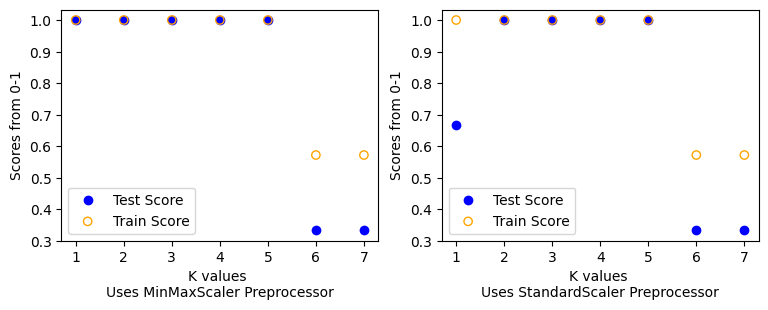

MinMaxScaler----> Test Scores:  [1.0, 1.0, 1.0, 1.0, 1.0, 0.33, 0.33] 
Train Scores:  [1.0, 1.0, 1.0, 1.0, 1.0, 0.57, 0.57]
StandardScaler----> Test Scores:  [0.67, 1.0, 1.0, 1.0, 1.0, 0.33, 0.33] 
Train Scores:  [1.0, 1.0, 1.0, 1.0, 1.0, 0.57, 0.57]


In [63]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

df = DataFrame()
df['Year'] = ['F','T','F','T',  'F','T','F','T',    'F','T']
df['enrol'] = [200, 100, 210, 105,   220, 120,230,90,   223, 102]
df['gpa'] = [2.9, 3.2, 3, 3.19,     3.05, 3.3, 28, 3.5,     3.1, 3.03]
dfX = df.drop(columns = ['Year'])
sy = df['Year']

from sklearn.model_selection import train_test_split
dfXtrain, dfXtest, sytrain, sytest = train_test_split(dfX, sy)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le = le.fit(sytrain)
ytrain = le.transform(sytrain)
ytest = le.transform(sytest.to_numpy())

fig, axs = plt.subplots(1,2, figsize = (9,3))

amlist = []
bmlist = []
aslist = []
bslist = []
for k in range(1,len(dfXtrain)+1):
    nl = preprocessing.MinMaxScaler()
    nl = nl.fit(dfXtrain.to_numpy())
    Xtrain = nl.transform(dfXtrain.to_numpy())
    knn = KNeighborsClassifier(n_neighbors = k)
    knn = knn.fit(Xtrain, ytrain)
    Xtest = nl.transform(dfXtest.to_numpy())
    knn.predict(Xtest)
    a = knn.score(Xtest, ytest)
    amlist.append(round(a, 2))
    b = knn.score(Xtrain, ytrain)
    bmlist.append(round(b, 2))
    axs[0].scatter(k, a, ec = 'blue', fc = 'blue', label='Test Score' if k == 1 else "")
    axs[0].scatter(k, b, ec = 'orange', fc = 'none', label='Train Score' if k == 1 else "")
axs[0].set_xlabel("K values \nUses MinMaxScaler Preprocessor")
axs[0].set_ylabel("Scores from 0-1")
axs[0].legend()

for k in range(1,len(dfXtrain)+1):
    stand = preprocessing.StandardScaler()
    stand = stand.fit(dfXtrain.to_numpy())
    Xtrain_s = stand.transform(dfXtrain.to_numpy())
    knn = KNeighborsClassifier(n_neighbors = k)
    knn = knn.fit(Xtrain, ytrain)
    Xtest = stand.transform(dfXtest.to_numpy())
    knn.predict(Xtest)
    a = knn.score(Xtest, ytest)
    aslist.append(round(a, 2))
    b = knn.score(Xtrain, ytrain)
    bslist.append(round(b, 2))
    axs[1].scatter(k, a, ec = 'blue', fc = 'blue', label='Test Score' if k == 1 else "")
    axs[1].scatter(k, b, ec = 'orange', fc = 'none', label='Train Score' if k == 1 else "")
axs[1].set_xlabel("K values \nUses StandardScaler Preprocessor")
axs[1].set_ylabel("Scores from 0-1")
axs[1].legend()
plt.show()
print("MinMaxScaler----> Test Scores: ", amlist, "\nTrain Scores: ", bmlist)
print("StandardScaler----> Test Scores: ", aslist, "\nTrain Scores: ", bslist)

## Task 3
I had two sets of variables, Xtrain or Xtrain_s. They both use the MinMaxScaler and StandardScaler preprocessors respectively. 

### Task 3a
I decided to use the MinMaxScaler because it was more accurate most of the times. I also made my k value equal 3, because no matter how many times I ran the code, it almost always showed that K value of 3 results in the highest accuracies in test and train sets.

In [3]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

df = DataFrame()
df['Year'] = ['F','T','F','T',  'F','T','F','T',    'F','T']
df['enrol'] = [200, 100, 210, 105,   220, 120,230,90,   223, 102]
df['gpa'] = [2.9, 3.2, 3, 3.19,     3.05, 3.3, 28, 3.5,     3.1, 3.03]
dfX = df.drop(columns = ['Year'])
sy = df['Year']

from sklearn.model_selection import train_test_split
dfXtrain, dfXtest, sytrain, sytest = train_test_split(dfX, sy)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
lefitted = le.fit(sytrain)
ytrain = lefitted.transform(sytrain)

nl = preprocessing.MinMaxScaler()
nlfitted = nl.fit(dfXtrain.to_numpy())
Xtrain = nlfitted.transform(dfXtrain.to_numpy())

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(Xtrain, ytrain)
ytest = le.transform(sytest.to_numpy())
Xtest = nl.transform(dfXtest.to_numpy())
knn.predict(Xtest)
knn.score(Xtest, ytest), knn.score(Xtrain, ytrain)

(1.0, 1.0)

### Task 3b

In [6]:
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 3)
knn = knn.fit(Xtrain, ytrain)
Xtest = nl.transform(dfXtest.to_numpy())
ypred = knn.predict(Xtest)
cm = confusion_matrix(ytest, ypred)
cm

array([[1, 0],
       [0, 2]], dtype=int64)

## Task 4
My values used for the attributes are [[150, 3.3]]. 

In [10]:
newdata = np.array([[150,3.3]])
Xnew = nl.transform(newdata)
knn.predict(Xnew), le.inverse_transform(knn.predict(Xnew))

(array([1]), array(['T'], dtype=object))